## Classification Practice

I will dive a little bit into the different classification methods in this excercise.
My goal is to understand better the different methods.

I'll use the diabetes dataset, that was evaluated previously (diabetes_eda.ipynb), so I won't spend lots of time with data cleaning and analysis. 

In [1]:
# import libraries
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning
from sklearn import model_selection, preprocessing, feature_selection, linear_model, metrics, naive_bayes, neighbors, tree, ensemble, neural_network
import xgboost as xgb
from catboost import CatBoostClassifier

In [2]:
data = pd.read_csv("/home/znagy2/data_development/notebooks/ML_practice/input/boston_cleaned.csv")
data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


First of all, I'll split the input data into train and test dataset.

In [3]:
y = data["Outcome"]
X = data.drop(["Outcome"],axis=1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=1)

### 1. Logistic Regression
Predict a binary outcome, such as yes or no, based on prior observations of a data set.

In [4]:
# call model
logistic = linear_model.LogisticRegression(solver="liblinear")
# train model
logistic_model = logistic.fit(X_train, y_train)
# make a prediction (train data)
y_pred = logistic_model.predict(X_train)

I'll use the confusion matrix in case of the upcoming methods, so it worths to write a function to plot it. 

In [5]:
def conf_matrix_plotter(y_pred, y_train):
    # calculate confusion matrix
    cf_matrix = metrics.confusion_matrix(y_train, y_pred)
    #plot confusion matrix
    plt.figure(figsize=(12,6))
    plt.title("Logistic Regression model - Confusion matrix", fontsize=18)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Reds')
    plt.xlabel("Predicted", fontsize=16)
    plt.ylabel("Actual", fontsize=16)
    plt.show()

I'll apply the function and visualize results.

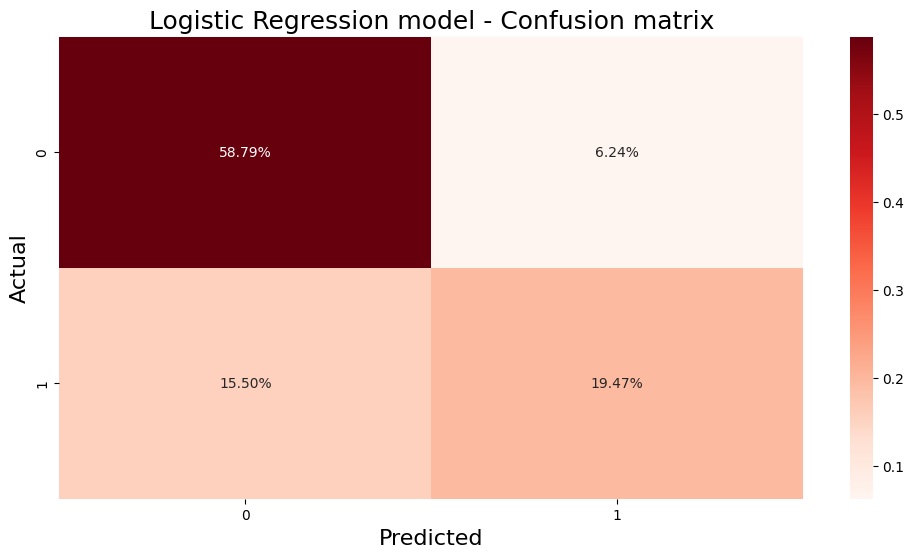

In [6]:
conf_matrix_plotter(y_pred, y_train)

According to the confusion matrix, the Accuracy is 78% in case of training dataset, that means the predicted category is correct in case of 8 out of 10 prediction. 

In [7]:
# print classification report
print(metrics.classification_report(y_train, y_pred))
print("Above table relates to the training dataset.")

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       344
           1       0.76      0.56      0.64       185

    accuracy                           0.78       529
   macro avg       0.77      0.73      0.74       529
weighted avg       0.78      0.78      0.77       529

Above table relates to the training dataset.


### Reciver Operating Characteristic (ROC) curve
- Considers all possible tresholds for given classifier.
- Instead of reporting precision and recall, it shows the false positive rate (FPR) against the true positive rate (TPR).

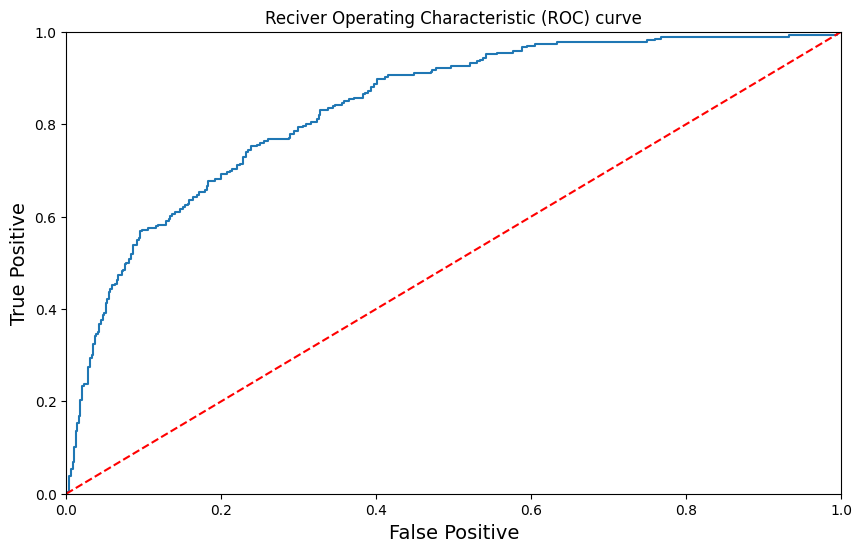

In [8]:
logistic_roc_auc = metrics.roc_auc_score(y, logistic_model.predict(X))

fpr, tpr, thresholds = metrics.roc_curve(y, logistic_model.predict_log_proba(X)[:, 1])
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive", fontsize=14)
plt.ylabel("True Positive", fontsize=14)
plt.title("Reciver Operating Characteristic (ROC) curve")
plt.show()

Red dashed line means a "random" sorting of observations. The Logistic Regression model perform better, than the random classification. 

In [9]:
test_acc = metrics.accuracy_score(y_test, logistic_model.predict(X_test))
print("Accuracy is", round(test_acc * 100, 1), "% in case of test data.")

Accuracy is 77.6 % in case of test data.


### 2. Naive Bayes Classifier
- "Probabilistic classifiers" based on applying Bayes' theorem
- strong (naive) independence assumptions between the features
- Naive Bayes classifiers are highly scalable
- Effective in solving a multiclass problem
- Does well with few samples for training when compared to other models like Logistic Regression
- Performs well in case of text analytics
- Not ideal for data sets with a large number of numerical attributes (computation demand)
- If a category is not captured in the training set and appears in the test data set then the model is assign 0 (zero) probability

In [10]:
# call model
navie = naive_bayes.GaussianNB()
# train model
navie_model = navie.fit(X_train,y_train)
# male prediction
y_pred = navie_model.predict(X_train)

Let's see the confusion matrix.

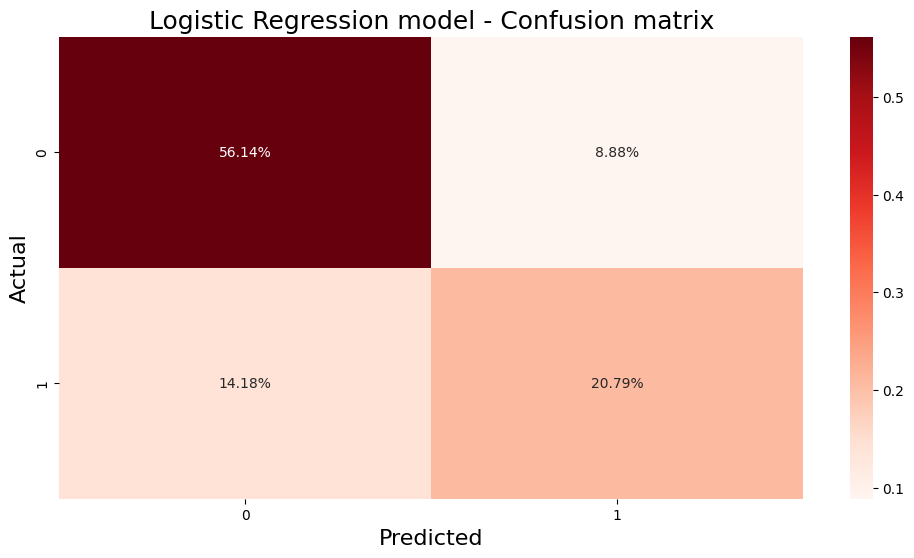

In [11]:
conf_matrix_plotter(y_pred, y_train)

In [12]:
# print classification report
print(metrics.classification_report(y_train, y_pred))
print("Above table relates to the training dataset.")

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       344
           1       0.70      0.59      0.64       185

    accuracy                           0.77       529
   macro avg       0.75      0.73      0.74       529
weighted avg       0.76      0.77      0.76       529

Above table relates to the training dataset.


In [13]:
test_acc = metrics.accuracy_score(y_test, navie_model.predict(X_test))
print("Accuracy is", round(test_acc * 100, 1), "% in case of test data.")

Accuracy is 75.0 % in case of test data.


Naive Bayes has almost no hyperparameters to tune, so it usually generalizes well. (BUT really sensitive to independence assumption).

### 3. K-Nearest Neighbor Classifier
- Based on the assumption that similar points can be found near one another
- This algorithm relies on distance for classification, so normalizing the training data can improve its accuracy dramatically
- Weights can be assigned to the contributions of the neighbors, so that the nearer neighbors contribute more than the more distant ones
- Pros: --> simple hyperparameter tuning (K)
- Cons: --> slow algorithm if number of observations increase

I'll start with scale the input data.

In [14]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# call mode (default k = 5)
knn = neighbors.KNeighborsClassifier(n_neighbors=5, metric='minkowski')
# train model
knn_model = knn.fit(X_train_scaled, y_train)
# make a prediction
y_pred = knn_model.predict(X_train_scaled)

Let's plot the confusion matrix.

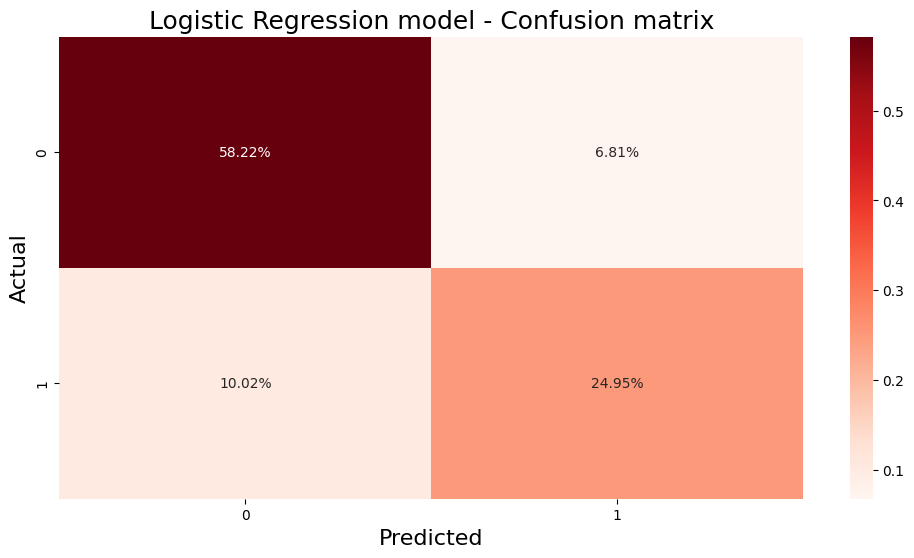

In [16]:
conf_matrix_plotter(y_pred, y_train)

In [17]:
# print classification report
print(metrics.classification_report(y_train, y_pred))
print("Above table relates to the training dataset.")

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       344
           1       0.79      0.71      0.75       185

    accuracy                           0.83       529
   macro avg       0.82      0.80      0.81       529
weighted avg       0.83      0.83      0.83       529

Above table relates to the training dataset.


I'll tune the k (n_neighbors) hyperparameter with the GridSearch algorithm.

In [18]:
# define parameter space
knn_params = {"n_neighbors": range(2, 30, 2)}
# call and train GridSearch 
knn_gridSearch = model_selection.GridSearchCV(knn, knn_params, cv=10)
knn_gridSearch.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 30, 2)})

In [19]:
print("Best Parameters: " + str(knn_gridSearch.best_params_))

Best Parameters: {'n_neighbors': 16}


### 4. Decision Tree
- decision tree is used as a predictive model to draw conclusions about a set of observations
- in the tree structure, leaves represent class labels and branches represent conjunctions of features that lead to those class labels
- Pros: --> less sensitivity to data preparation, don't required normalization/scaling, missing values do not affect the results, easy to explain
- Cons: --> instable (small change in data result a change in structure), calculation could be complex, time demand in training

In [20]:
# call and train model
decision_tree = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree.fit(X_train, y_train)
# make a prediction
y_pred = decision_tree_model.predict(X_test)

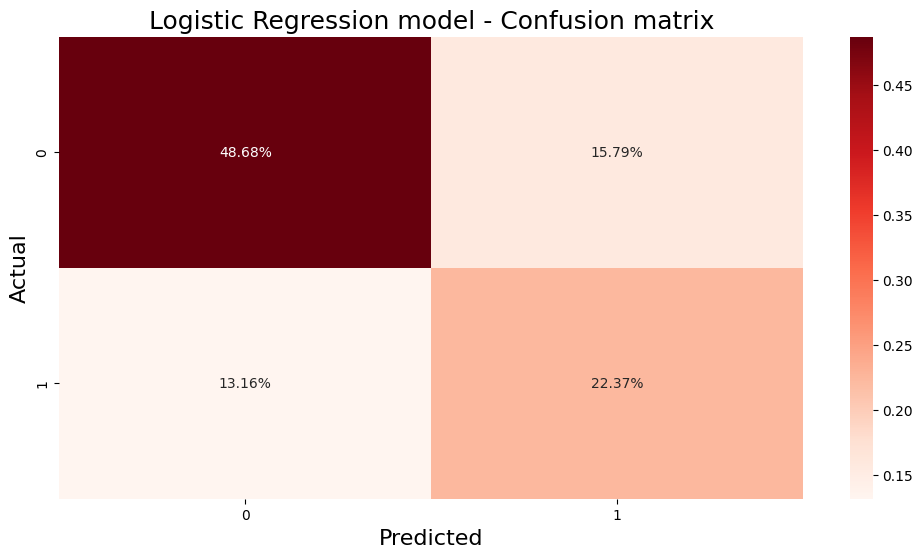

              precision    recall  f1-score   support

           0       0.79      0.76      0.77       147
           1       0.59      0.63      0.61        81

    accuracy                           0.71       228
   macro avg       0.69      0.69      0.69       228
weighted avg       0.72      0.71      0.71       228

Above table relates to the TEST dataset.


In [21]:
# plot confusion matrix
conf_matrix_plotter(y_pred, y_test)
# print classification report
print(metrics.classification_report(y_test, y_pred))
print("Above table relates to the TEST dataset.")

The decision tree resulted a high training performance, the accuracy was 100% after the training.
That's the reason why I plotted the confusion matrix of the test data.
We can conclude that the test accuracy is lower than the training accuracy, that meant model was overfitted.

I'll tune the max_depth and min_samples_split hyperparameters.

In [22]:
# define sample space
decision_params = {
    "max_depth": range(1, 10, 2),
    "min_samples_split": list(range(2, 50, 5))
}
# call and train GridSearch
decision_gridSearch = model_selection.GridSearchCV(decision_tree, decision_params, cv=10, n_jobs=-1, verbose=2)
decision_gridSearch.fit(X_train, y_train)
# print best parameters
decision_gridSearch.best_params_

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s

[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=7; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=7; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=7; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=7; total time=   0.0s
[CV] END ..................max_depth=1, min_samples_split=12; total time=   0.0s
[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ..................max_depth=1, min_sa

{'max_depth': 5, 'min_samples_split': 32}

In [23]:
# call and train model
decision_tree_tuned = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=27)
decision_tree_model_tuned = decision_tree_tuned.fit(X_train, y_train)
# make a prediction
y_pred_tuned = decision_tree_model_tuned.predict(X_test)

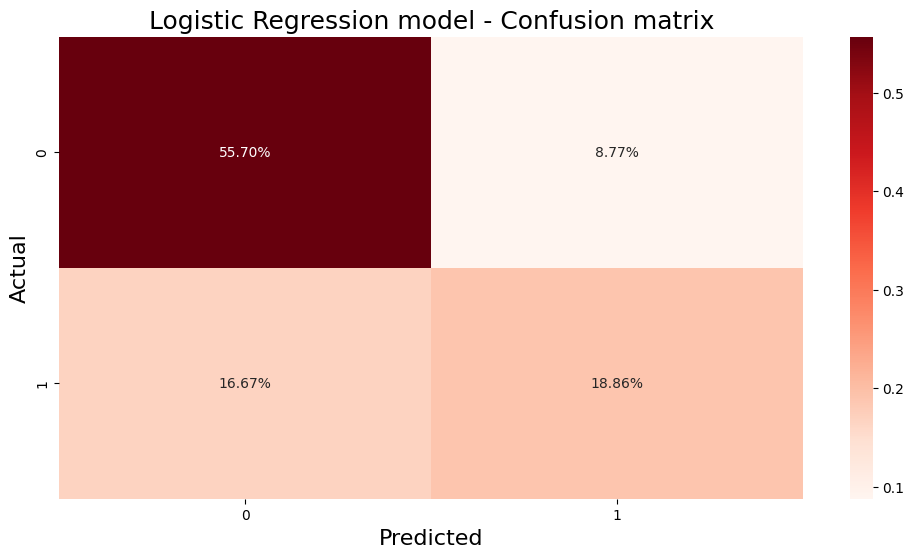

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       147
           1       0.68      0.53      0.60        81

    accuracy                           0.75       228
   macro avg       0.73      0.70      0.71       228
weighted avg       0.74      0.75      0.74       228

Above table relates to the TEST dataset.


In [24]:
# plot confusion matrix
conf_matrix_plotter(y_pred_tuned, y_test)
# print classification report
print(metrics.classification_report(y_test, y_pred_tuned))
print("Above table relates to the TEST dataset.")

Hyper parameter tuning was able to improve accuracy with 3 % in case of test data.

### 4. Random Forest
- it relies on collecting various decision trees to arrive at any solution
- Pros: robust (resist to outliers), works well with non-linear data, lower risk of overfitting, better accuracy than other classification algorithms
- Pros: could be biased while dealing with categorical variables, slow training, not suitable for linear methods with a lot of sparse features

In [25]:
# call and train model
randomF_classifier = ensemble.RandomForestClassifier()
randomF_classifierModel = randomF_classifier.fit(X_train, y_train)
# make a prediction
y_pred = randomF_classifierModel.predict(X_test)

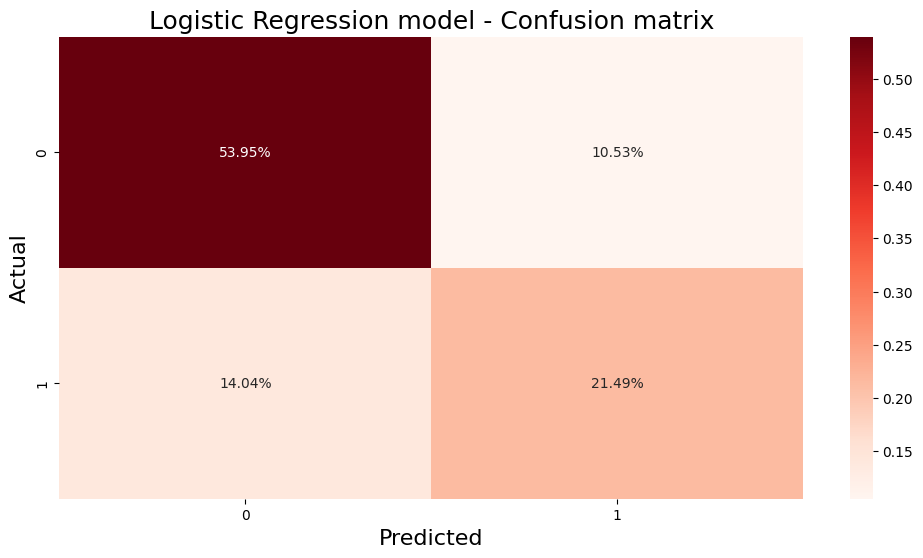

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       147
           1       0.67      0.60      0.64        81

    accuracy                           0.75       228
   macro avg       0.73      0.72      0.73       228
weighted avg       0.75      0.75      0.75       228

Above table relates to the TEST dataset.


In [26]:
# plot confusion matrix
conf_matrix_plotter(y_pred, y_test)
# print classification report
print(metrics.classification_report(y_test, y_pred))
print("Above table relates to the TEST dataset.")

Default model accuracy is not bad 75 %, I'll tune the max_depth, max_features, n_estimators, min_samples_split hyperparameters.

In [27]:
# define sample space
randomF_params = {
    "max_depth": range(2,30, 4),
    "max_features": range(2, 7),
    "n_estimators":[10, 50, 100, 250, 500],
    "min_samples_split": range(2, 20, 3)
}
# call and train GridSearch
randomF_gridSearch = model_selection.GridSearchCV(randomF_classifier, randomF_params, cv=10, n_jobs=-1, verbose=2)
randomF_gridSearch.fit(X_train, y_train)
randomF_gridSearch.best_params_

Fitting 10 folds for each of 1050 candidates, totalling 10500 fits
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=2, max_features=2, min_samples_split=2, n_estimators=10; to

{'max_depth': 14,
 'max_features': 2,
 'min_samples_split': 8,
 'n_estimators': 10}

In [28]:
# call and train model
randomF_classifier_tuned = ensemble.RandomForestClassifier(max_depth=18, max_features=3, min_samples_split=8, n_estimators=10)
randomF_classifierModel_tuned = randomF_classifier_tuned.fit(X_train, y_train)
# make a prediction
y_pred_tuned = randomF_classifierModel_tuned.predict(X_test)

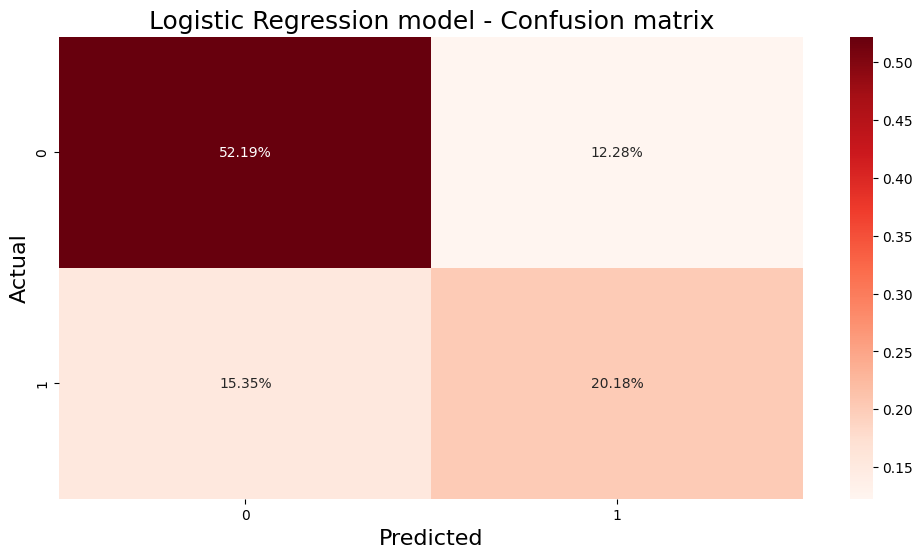

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       147
           1       0.62      0.57      0.59        81

    accuracy                           0.72       228
   macro avg       0.70      0.69      0.69       228
weighted avg       0.72      0.72      0.72       228

Above table relates to the TEST dataset.


In [29]:
# plot confusion matrix
conf_matrix_plotter(y_pred_tuned, y_test)
# print classification report
print(metrics.classification_report(y_test, y_pred_tuned))
print("Above table relates to the TEST dataset.")

The hyperparameter tuning slightly decreased the accuracy (1%) and the false positive rate, but the false negative rate was increased.

## Gradient Boosting Methods
- ensemble learning method
- uses an iterative approach to learn from the mistakes of weak classifiers, and turn them into strong ones
- Pros: easy-to-read and interpret algorithm, boosting can handle overfitting effectively
- Cons: sensitive to outliers, the method is almost impossible to scale up, 

### 5. Adaptive Boosting (AdaBoost) 

In [30]:
# call and train model
adaptive = ensemble.GradientBoostingClassifier()
adaptive_model = adaptive.fit(X_train, y_train)
# make a prediction
y_pred = adaptive_model.predict(X_test)

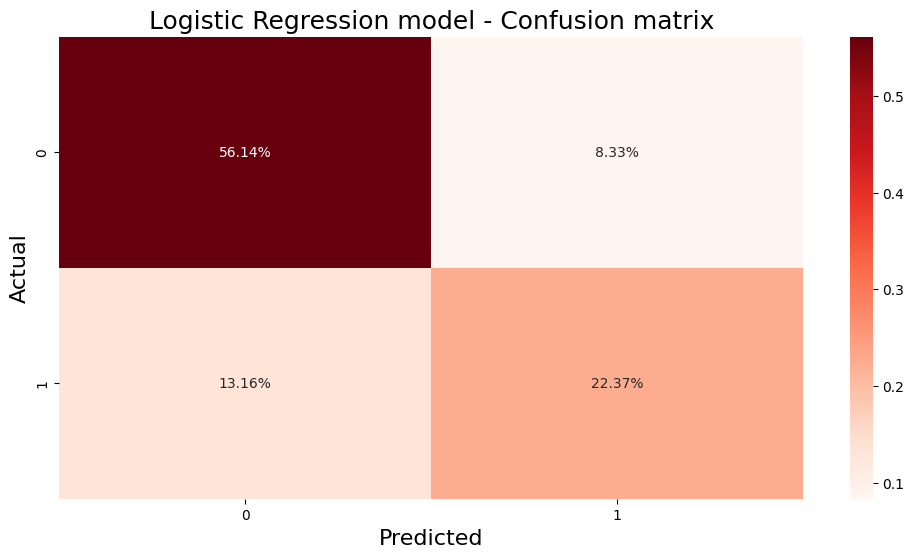

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       147
           1       0.73      0.63      0.68        81

    accuracy                           0.79       228
   macro avg       0.77      0.75      0.76       228
weighted avg       0.78      0.79      0.78       228

Above table relates to the TEST dataset.


In [31]:
# plot confusion matrix
conf_matrix_plotter(y_pred, y_test)
# print classification report
print(metrics.classification_report(y_test, y_pred))
print("Above table relates to the TEST dataset.")

I'll tune the learning_rate, n_estimators, min_samples_split hyperparameters.

In [32]:
# define sample space
adaptive_params = {
    "learning_rate": [0.01, 0.03, 0.06, 0.1, 0.5],
    "n_estimators":[10, 50, 100, 250, 500],
    "min_samples_split": range(2, 20, 3)
}
# call and train GridSearch
adaptive_gridSearch = model_selection.GridSearchCV(adaptive, adaptive_params, cv=10, n_jobs=-1, verbose=2)
adaptive_gridSearch.fit(X_train, y_train)
adaptive_gridSearch.best_params_

Fitting 10 folds for each of 150 candidates, totalling 1500 fits
[CV] END learning_rate=0.01, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END learning_rate=0.01, min_samples_split=2, n_estimators=50; total ti

{'learning_rate': 0.06, 'min_samples_split': 14, 'n_estimators': 100}

In [33]:
# call and train model
adaptive_tuned = ensemble.GradientBoostingClassifier(learning_rate=0.06, min_samples_split=14, n_estimators=100)
adaptive_model_tuned = adaptive_tuned.fit(X_train, y_train)
# make a prediction
y_pred_tuned = adaptive_model_tuned.predict(X_test)

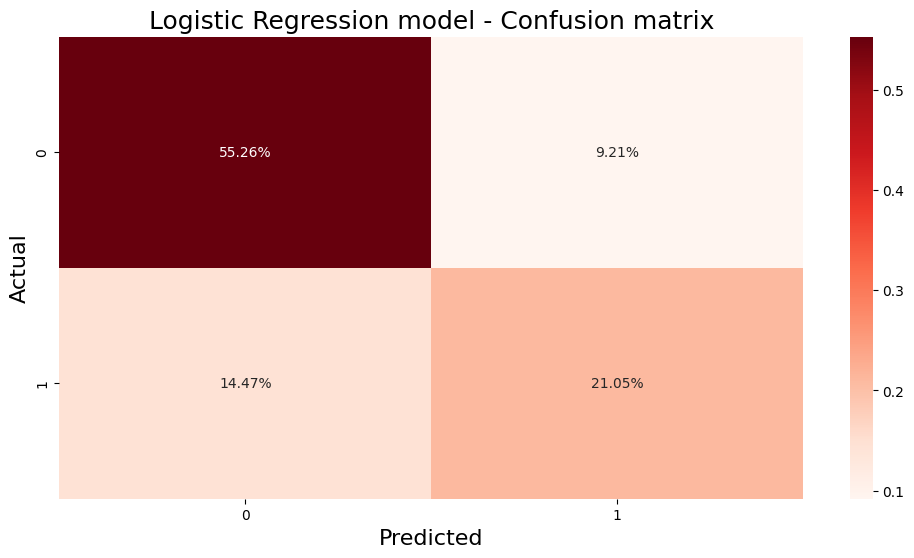

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       147
           1       0.70      0.59      0.64        81

    accuracy                           0.76       228
   macro avg       0.74      0.72      0.73       228
weighted avg       0.76      0.76      0.76       228

Above table relates to the TEST dataset.


In [34]:
# plot confusion matrix
conf_matrix_plotter(y_pred_tuned, y_test)
# print classification report
print(metrics.classification_report(y_test, y_pred_tuned))
print("Above table relates to the TEST dataset.")

### 6. Extreme Gradient Boosting (XGBoost)

In [35]:
# call and train model
xgb_model = xgb.XGBClassifier().fit(X_train,y_train)
# make a prediction
y_pred = xgb_model.predict(X_test)

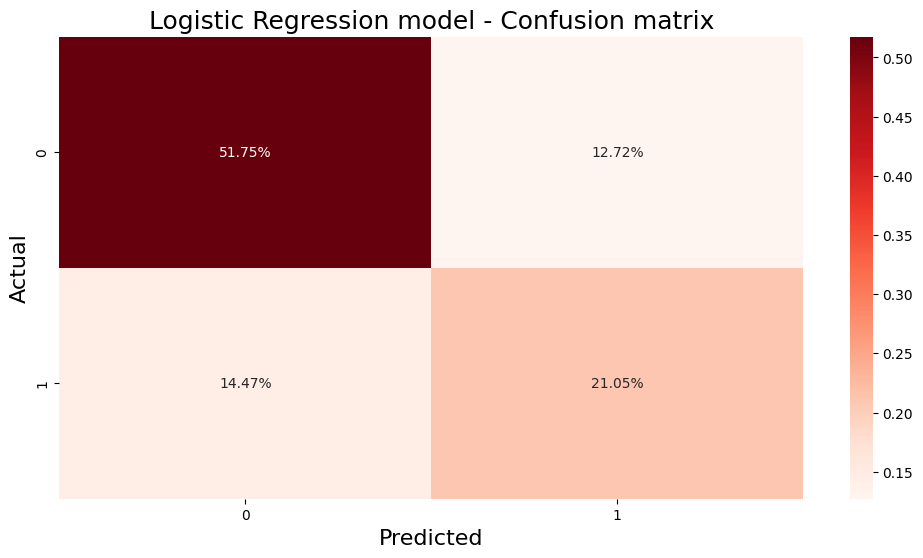

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       147
           1       0.62      0.59      0.61        81

    accuracy                           0.73       228
   macro avg       0.70      0.70      0.70       228
weighted avg       0.73      0.73      0.73       228

Above table relates to the TEST dataset.


In [36]:
# plot confusion matrix
conf_matrix_plotter(y_pred, y_test)
# print classification report
print(metrics.classification_report(y_test, y_pred))
print("Above table relates to the TEST dataset.")

### 7. Categorical Boosting (CatBoost)

In [37]:
# call and train model
cat_model = CatBoostClassifier().fit(X_train, y_train)
y_pred = cat_model.predict(X_test)

Learning rate set to 0.00785
0:	learn: 0.6885826	total: 48.4ms	remaining: 48.3s
1:	learn: 0.6834855	total: 49ms	remaining: 24.5s
2:	learn: 0.6792702	total: 49.9ms	remaining: 16.6s
3:	learn: 0.6758742	total: 50.5ms	remaining: 12.6s
4:	learn: 0.6719234	total: 51.1ms	remaining: 10.2s
5:	learn: 0.6681818	total: 52ms	remaining: 8.62s
6:	learn: 0.6643848	total: 52.7ms	remaining: 7.48s
7:	learn: 0.6603604	total: 53.4ms	remaining: 6.62s
8:	learn: 0.6571731	total: 54.2ms	remaining: 5.97s
9:	learn: 0.6536184	total: 54.9ms	remaining: 5.43s
10:	learn: 0.6501079	total: 55.5ms	remaining: 4.99s
11:	learn: 0.6474601	total: 56.2ms	remaining: 4.62s
12:	learn: 0.6438625	total: 56.8ms	remaining: 4.31s
13:	learn: 0.6403957	total: 57.4ms	remaining: 4.04s
14:	learn: 0.6371078	total: 58ms	remaining: 3.81s
15:	learn: 0.6344354	total: 58.7ms	remaining: 3.61s
16:	learn: 0.6314033	total: 59.3ms	remaining: 3.43s
17:	learn: 0.6277842	total: 60.3ms	remaining: 3.29s
18:	learn: 0.6245784	total: 61.6ms	remaining: 3.18s

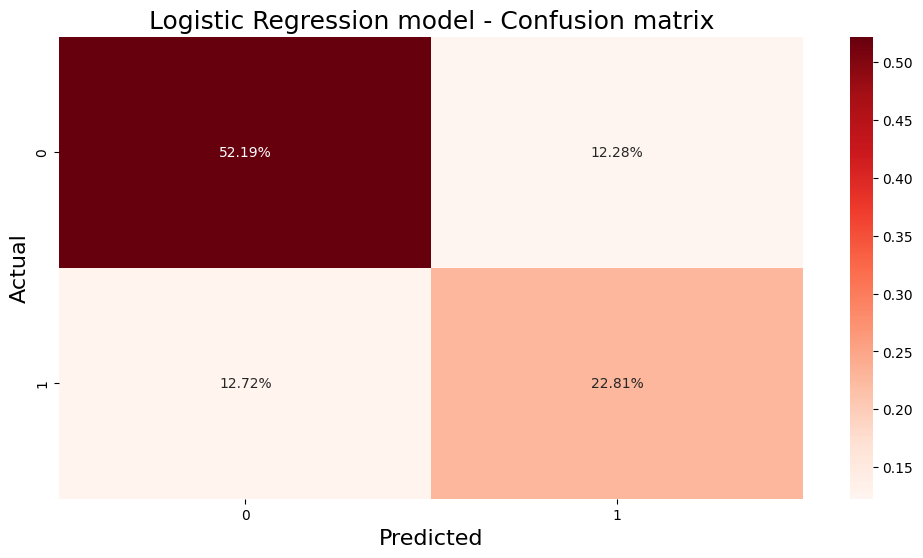

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       147
           1       0.65      0.64      0.65        81

    accuracy                           0.75       228
   macro avg       0.73      0.73      0.73       228
weighted avg       0.75      0.75      0.75       228

Above table relates to the TEST dataset.


In [38]:
# plot confusion matrix
conf_matrix_plotter(y_pred, y_test)
# print classification report
print(metrics.classification_report(y_test, y_pred))
print("Above table relates to the TEST dataset.")

### 8. Artificial Neural Network

In [39]:
# call and train model
mlpc = neural_network.MLPClassifier().fit(X_train_scaled, y_train)
# make a prediction
y_pred = mlpc.predict(X_test_scaled)

/home/znagy2/ds_az/eda_ml/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


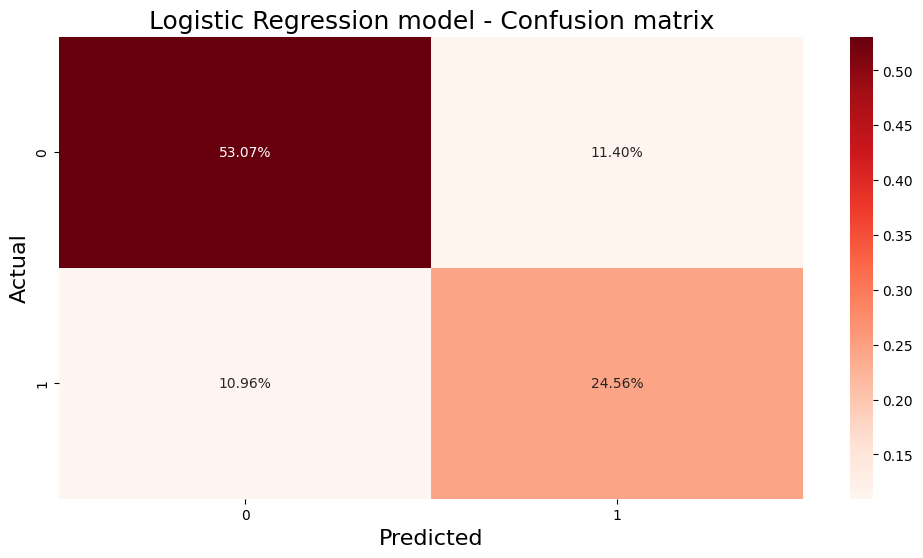

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       147
           1       0.68      0.69      0.69        81

    accuracy                           0.78       228
   macro avg       0.76      0.76      0.76       228
weighted avg       0.78      0.78      0.78       228

Above table relates to the TEST dataset.


In [40]:
# plot confusion matrix
conf_matrix_plotter(y_pred, y_test)
# print classification report
print(metrics.classification_report(y_test, y_pred))
print("Above table relates to the TEST dataset.")